In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing hr_data file  

In [3]:
import pandas as pd
hr_df=pd.read_csv("../input/prediction/hr_data.csv")
hr_df.head

<bound method NDFrame.head of        employee_id  number_project  average_montly_hours  time_spend_company  \
0             1003               2                   157                   3   
1             1005               5                   262                   6   
2             1486               7                   272                   4   
3             1038               5                   223                   5   
4             1057               2                   159                   3   
...            ...             ...                   ...                 ...   
14994        87670               2                   151                   3   
14995        87673               2                   160                   3   
14996        87679               2                   143                   3   
14997        87681               6                   280                   4   
14998        87684               2                   158                   3   

       Wo

In [4]:
hr_df.shape

(14999, 9)

In [5]:
hr_df.size

134991

In [7]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [8]:
hr_df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
hr_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
hr_df['average_montly_hours'].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [11]:
hr_df['promotion_last_5years'].unique()

array([0, 1])

# Loading Satisfaction Dataset ( ie. employee_satisfaction_evaluation file)

In [12]:
s_df = pd.read_excel(r'../input/prediction/employee_satisfaction_evaluation.xlsx')

In [13]:
s_df

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


# Numerical Analysis

In [14]:
main_df = hr_df.set_index('employee_id').join(s_df.set_index('EMPLOYEE #'))

In [15]:
main_df                    # Here , empolyee_id has not been counted in columns......To solve this problem , we will use reset_index

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
87670,2,151,3,0,1,0,support,low,0.40,0.57
87673,2,160,3,0,1,0,support,low,0.37,0.48
87679,2,143,3,0,1,0,support,low,0.37,0.53


In [16]:
main_df = main_df.reset_index()

In [17]:
main_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


In [18]:
main_df.info()            # In this main_df, we have 27 rows of null values( ie. Missing values) in satisfaction_level and last_evaluation columns.......

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [19]:
main_df[main_df.isnull().any(axis = 1)]               # This will show those 27 rows which contains null values......Here, axis = 1 means rows and axis = 0 means columns

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


In [20]:
main_df.isnull().sum()               # This shows us very clearly that which all columns contains Null values

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [21]:
# Now we have 2 options : 1) Either drop those rows which contains Null values (Not Recommended .....because by doing this we may loose many important informations)
#                         2) Fill up those Null values      ( So....its always better to fill up those Null values)

In [22]:

main_df.describe() #des() is used to find mean,count,min,max,per

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
main_df.fillna(main_df.mean(), inplace=True)        # Here, we have replcace those Null values with Mean values (According to their columns).....and inplace=True means the changes that we have done are permanent.....

In [25]:
main_df.isnull().sum()                 # We can see that...... the Null values have successfully been replaced by their respective Mean values.....

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [26]:
main_df[main_df.isnull().any(axis=1)]           # Now there are no Null values

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation


In [27]:
main_df.loc[main_df['employee_id'] == 3794]         # loc is label-based....we have to specify the name of the rows and columns that we need to filter out......

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [29]:
main_df.loc[main_df['employee_id'] == 1140]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
19,1140,5,262,5,0,1,0,sales,low,0.61283,0.89


# Droping Employee_id.....Because now we don't need it

In [30]:
main_df.drop(columns = 'employee_id', inplace = True)

In [31]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57
14995,2,160,3,0,1,0,support,low,0.37,0.48
14996,2,143,3,0,1,0,support,low,0.37,0.53
14997,6,280,4,0,1,0,support,low,0.11,0.96


In [32]:
main_df.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [33]:
main_df.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [34]:

main_df['department'].value_counts()                     # This data shows how many employees are working in the different departments.....

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

# Data Visualization

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

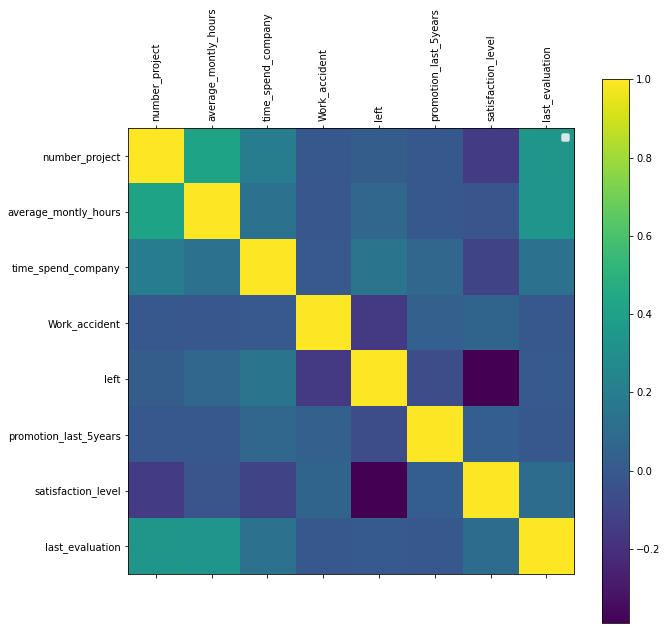

In [36]:
def plot_corr(df, size = 10):
    corr = df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.legend()
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(main_df)

<BarContainer object of 14999 artists>

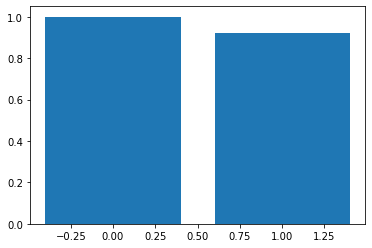

In [37]:
plt.bar(x = main_df['left'], height=main_df['satisfaction_level'])

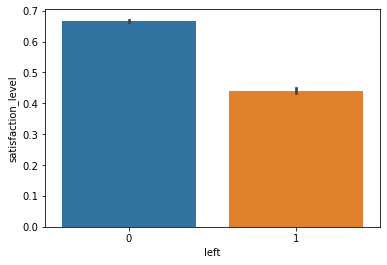

In [38]:
sns.barplot(x = 'left', y = 'satisfaction_level', data = main_df)       # Seaborn is better for data visualization....... Here, 0 means not left and 1 means left the company

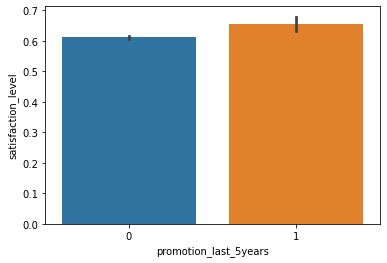

In [39]:
sns.barplot(x = 'promotion_last_5years', y = 'satisfaction_level', data = main_df)

# Data Preprocessing

In [40]:
main_df[['department', 'salary']]

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
main_df['salary'] = le.fit_transform(main_df['salary'])

In [42]:
main_df 

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,1,0.38,0.53
1,5,262,6,0,1,0,sales,2,0.80,0.86
2,7,272,4,0,1,0,sales,2,0.11,0.88
3,5,223,5,0,1,0,sales,1,0.72,0.87
4,2,159,3,0,1,0,sales,1,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,1,0.40,0.57
14995,2,160,3,0,1,0,support,1,0.37,0.48
14996,2,143,3,0,1,0,support,1,0.37,0.53
14997,6,280,4,0,1,0,support,1,0.11,0.96


In [43]:
main_df['salary'].unique()         # Here, low = 1, medium = 2 and high = 0

array([1, 2, 0])

In [44]:
main_df['department'] = le.fit_transform(main_df['department'])

In [45]:
main_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,7,1,0.38,0.53
1,5,262,6,0,1,0,7,2,0.80,0.86
2,7,272,4,0,1,0,7,2,0.11,0.88
3,5,223,5,0,1,0,7,1,0.72,0.87
4,2,159,3,0,1,0,7,1,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,8,1,0.40,0.57
14995,2,160,3,0,1,0,8,1,0.37,0.48
14996,2,143,3,0,1,0,8,1,0.37,0.53
14997,6,280,4,0,1,0,8,1,0.11,0.96


In [46]:
main_df['department'].unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

# Spliting our data into training and testing phase

In [47]:

x = main_df.drop(['left'], axis=1)
y = main_df['left']

In [48]:
x

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,0,7,1,0.38,0.53
1,5,262,6,0,0,7,2,0.80,0.86
2,7,272,4,0,0,7,2,0.11,0.88
3,5,223,5,0,0,7,1,0.72,0.87
4,2,159,3,0,0,7,1,0.37,0.52
...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,0,8,1,0.40,0.57
14995,2,160,3,0,0,8,1,0.37,0.48
14996,2,143,3,0,0,8,1,0.37,0.53
14997,6,280,4,0,0,8,1,0.11,0.96


In [49]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [50]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,)
scores_dict = {}

In [51]:
x_train

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
11221,3,202,6,0,0,9,1,0.96,0.48
505,6,289,5,0,0,8,2,0.11,0.97
5411,2,163,2,0,0,6,1,0.20,0.51
113,4,258,5,0,0,9,2,0.90,0.96
14949,2,147,3,1,0,4,1,0.42,0.57
...,...,...,...,...,...,...,...,...,...
7954,5,198,2,0,0,7,2,0.96,0.90
7571,3,201,3,0,0,7,2,0.60,0.58
12645,2,141,3,0,0,9,2,0.40,0.54
3406,4,192,3,0,0,8,1,0.60,0.63


In [52]:
x_test

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
3503,4,245,3,0,0,6,2,0.57,0.77
7769,3,175,2,0,0,0,2,0.73,0.69
13041,5,200,4,0,0,6,2,0.59,0.39
14499,5,232,5,0,0,9,1,0.82,0.91
14544,2,145,3,0,0,7,2,0.45,0.52
...,...,...,...,...,...,...,...,...,...
12583,2,145,3,0,0,8,2,0.44,0.56
3006,3,153,4,0,0,2,1,0.84,0.85
6217,3,206,2,0,0,9,1,0.80,0.55
490,4,281,6,0,0,3,2,0.53,0.56


In [53]:
y_train

11221    0
505      1
5411     0
113      1
14949    1
        ..
7954     0
7571     0
12645    1
3406     0
3436     0
Name: left, Length: 10499, dtype: int64

In [54]:
y_test

3503     0
7769     0
13041    0
14499    1
14544    1
        ..
12583    1
3006     0
6217     0
490      1
14122    0
Name: left, Length: 4500, dtype: int64

In [55]:
from sklearn.metrics import accuracy_score, classification_report

# Model Training

# 1. Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
prediction_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, prediction_dt) * 100

In [57]:
print('Accuracy Score :', accuracy_dt)
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(classification_report(y_test,prediction_dt))

Accuracy Score : 97.6888888888889
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3439
           1       0.94      0.96      0.95      1061

    accuracy                           0.98      4500
   macro avg       0.96      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



# Testing your own data

In [58]:

Catagory=['Employee will stay','Employee will Leave']

In [59]:
custom_dt = [[1,500,3,6,0,0.90,0.89,0.23,0.89]]

In [60]:
Catagory[int(dt.predict(custom_dt))]

'Employee will Leave'

In [61]:
custom_dt2 = [[4, 135, 2, 1, 0, 4, 2, 0.89, 0.62]]

In [62]:
Catagory[int(dt.predict(custom_dt2))]

'Employee will stay'

# Finding out the most important parameter

In [63]:
dt.feature_importances_

array([1.03044172e-01, 9.51028174e-02, 1.50305244e-01, 2.15631577e-03,
       3.02921289e-05, 1.34739544e-02, 6.21594993e-03, 4.84636718e-01,
       1.45034537e-01])

In [64]:
feature_importance = pd.DataFrame(dt.feature_importances_, index = x_train.columns, columns = ['Importance']).sort_values('Importance', ascending=False)

# 2. KNN

In [65]:
from sklearn.preprocessing import StandardScaler      # StandardScaler is use to standardised your data in a particular range......Because, in KNN we have to calculate the distance....so it is always recommended to standardised your data......
sc = StandardScaler().fit(x_train)                    # Here, fit is used analyse the pattern 
x_train_std = sc.transform(x_train)                   # After analysing the pattern, it will transform the data accordingly
x_test_std = sc.transform(x_test)

In [66]:

x_train_std                              # Now the data has been scaled in a particular range

array([[-0.65315613,  0.00805467,  1.6972249 , ..., -0.55504357,
         1.39064875, -1.38797098],
       [ 1.78954853,  1.75230395,  1.0181409 , ...,  1.04281835,
        -2.03101137,  1.47575864],
       [-1.46739102, -0.77385017, -1.01911111, ..., -0.55504357,
        -1.66871794, -1.21264059],
       ...,
       [-1.46739102, -1.2149247 , -0.34002711, ...,  1.04281835,
        -0.86362145, -1.03731021],
       [ 0.16107876, -0.19243375, -0.34002711, ..., -0.55504357,
        -0.05852495, -0.51131905],
       [ 0.97531364, -0.85404554, -1.01911111, ..., -0.55504357,
        -1.86999207, -2.08929252]])

In [67]:
x_test_std

array([[ 0.16107876,  0.87015489, -0.34002711, ...,  1.04281835,
        -0.17928942,  0.30688941],
       [-0.65315613, -0.53326407, -1.01911111, ...,  1.04281835,
         0.46478778, -0.16065828],
       [ 0.97531364, -0.03204301,  0.3390569 , ...,  1.04281835,
        -0.09877977, -1.91396213],
       ...,
       [-0.65315613,  0.08825004, -1.01911111, ..., -0.55504357,
         0.74657155, -0.97886675],
       [ 0.16107876,  1.59191321,  1.6972249 , ...,  1.04281835,
        -0.34030872, -0.92042329],
       [-1.46739102, -0.23253143, -0.34002711, ..., -0.55504357,
         0.10249435, -0.45287559]])

In [68]:
from sklearn.neighbors import KNeighborsClassifier

k_range=range(3,26)
scores={}
scores_list=[]
bestk=0
h_score = 0

for i in range(3,26):
    clf = KNeighborsClassifier(n_neighbors=i).fit(x_train_std,y_train)
    pred = clf.predict(x_test_std)
    scores[i]=accuracy_score(y_test,pred)
    if scores[i]>h_score:
        h_score = scores[i]
        bestk = i
    scores_list.append(scores[i])
print('Best k is {} with score : {}'.format(bestk,h_score))

Best k is 4 with score : 0.9611111111111111


In [69]:
knn=KNeighborsClassifier(n_neighbors=bestk)
knn.fit(x_train_std,y_train)
prediction_knn=knn.predict(x_test_std)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100

In [70]:
print('Accuracy score : ',accuracy_knn)
scores_dict['KNeighborsClassifier'] = accuracy_score(y_test,prediction_knn)*100
print(classification_report(y_test,prediction_knn))

Accuracy score :  96.11111111111111
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3439
           1       0.92      0.92      0.92      1061

    accuracy                           0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



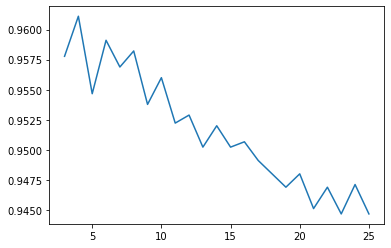

In [71]:
plt.plot(k_range,scores_list)

In [ ]:

algorithms = ['Decision Tree', 'KNN']        # As we can see, Decision Tree works better as compared to KNN
scores = [accuracy_dt, accuracy_knn]
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
sns.barplot(algorithms, scores)
plt.show()